# 

In [2]:
#Loading improtant libraries for the code

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

Loading the data for imu in four different positions

In [15]:
# Loading the data for imu in four different positions
# The data is in the form of csv files
half_theta_2 = pd.read_csv('Half_theta_2.csv') 
df = half_theta_2
df.head()


,xAccl,yAccl,zAccl,newPosition,time,pcTime
0,1007,-66,-48,0,346576,440.875053
1,1007,-72,-59,0,371498,465.658903
2,1008,-75,-45,0,396502,490.717888
3,1006,-65,-53,0,421509,515.764952
4,1011,-67,-53,0,446513,540.741920


In [5]:
df['delta_time'] = df['pcTime'].diff()
df.head(10)

,xAccl,yAccl,zAccl,newPosition,time,pcTime,delta_time
0,1007,-66,-48,0,346576,440.875053,NaN
1,1007,-72,-59,0,371498,465.658903,24.783850
2,1008,-75,-45,0,396502,490.717888,25.058985
3,1006,-65,-53,0,421509,515.764952,25.047064
4,1011,-67,-53,0,446513,540.741920,24.976969
5,1008,-74,-44,0,471520,565.711021,24.969101
6,1007,-75,-54,0,496524,590.770006,25.058985
7,1009,-70,-54,0,521532,615.640163,24.870157
8,1011,-68,-55,0,546535,640.830040,25.189877
9,1008,-77,-49,0,571542,665.774107,24.944067


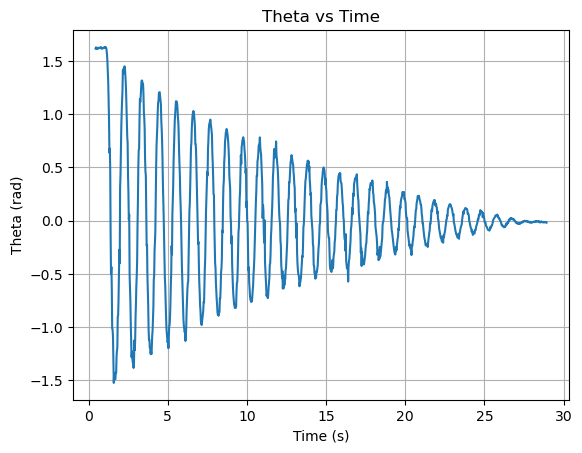

In [9]:
# plotting the angle of the IMU (theta) over time
theta = np.arctan2(df['xAccl'], df['zAccl'])
# theta = np.degrees(theta)
plt.plot(df['pcTime']/1000, theta)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Time')
plt.grid()
plt.show()



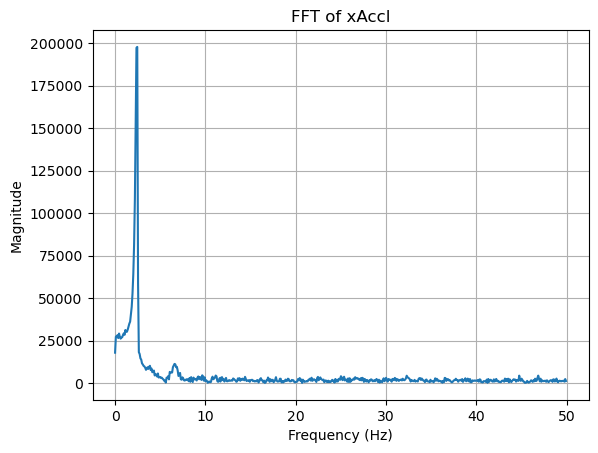

In [10]:
# plotting the angle of the IMU (theta) over time

data = fft(df['xAccl']) # FFT of the xAccl data
fftfreqs = fftfreq(len(data), d=0.01) # Sampling frequency is 100Hz
plt.plot(fftfreqs[:len(data)//2], np.abs(data)[:len(data)//2]) # Plotting only the positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of xAccl')
plt.grid()
plt.show()



In [13]:
# Plotting the FFT of the xAccl data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
from pykalman import KalmanFilter


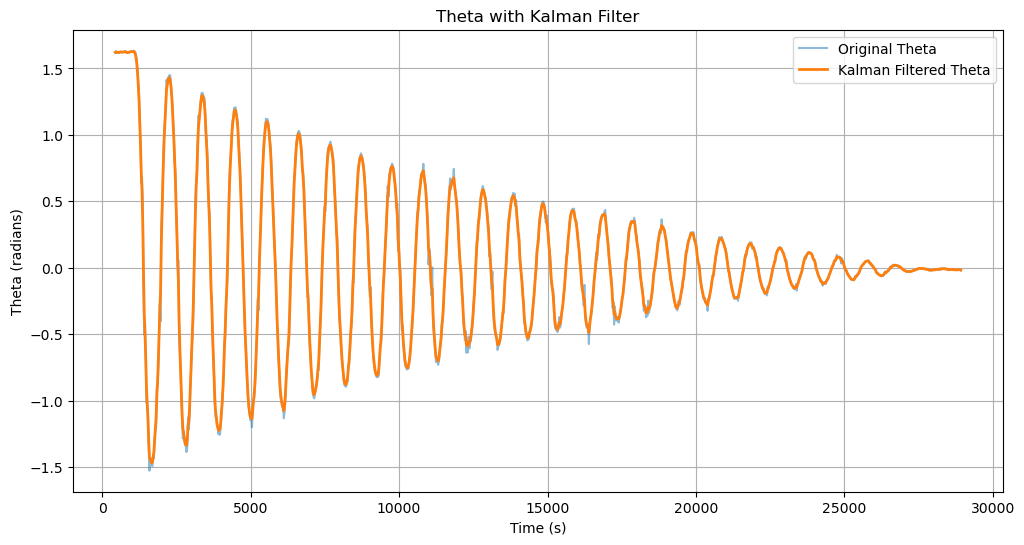

In [17]:

# Calculate theta from accelerometer data
theta = np.arctan2(df['xAccl'], df['zAccl'])

# Initialize Kalman filter
kf = KalmanFilter(
    initial_state_mean=theta[0],
    transition_matrices=[1],  # Assumes state transition is 1: x_k = x_{k-1}
    observation_matrices=[1],  # Measurement is directly related to state
    transition_covariance=[[1e-3]],  # Process noise
    observation_covariance=[[0.001]]  # Measurement noise
)

# Apply Kalman filter
theta_kalman, _ = kf.smooth(theta)

# Plot original and filtered theta
plt.figure(figsize=(12, 6))
plt.plot(df['pcTime'], theta, label='Original Theta', alpha=0.5)
plt.plot(df['pcTime'], theta_kalman, label='Kalman Filtered Theta', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Theta with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()


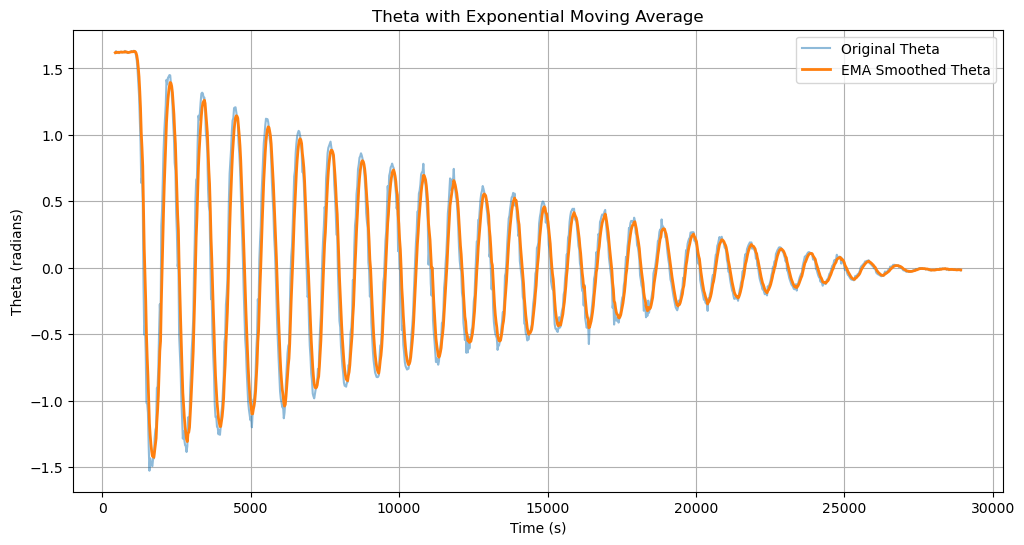

In [18]:


# Apply Exponential Moving Average (EMA) to the 'theta' column
def exponential_moving_average(data, window_size):
    alpha = 2 / (window_size + 1)
    ema = np.zeros_like(data)
    ema[0] = data[0]  # Initialize the first value
    for i in range(1, len(data)):
        ema[i] = alpha * data[i] + (1 - alpha) * ema[i - 1]
    return ema
# Set the window size for EMA
window_size = 5
# Calculate EMA
theta_ema = exponential_moving_average(theta, window_size)
# Plot original and EMA smoothed theta
plt.figure(figsize=(12, 6))
plt.plot(df['pcTime'], theta, label='Original Theta', alpha=0.5)
plt.plot(df['pcTime'], theta_ema, label='EMA Smoothed Theta', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Theta (radians)')
plt.title('Theta with Exponential Moving Average')
plt.legend()
plt.grid(True)
plt.show()



In [7]:
theta_kalman = theta_kalman.reshape(-1)


In [8]:
# Calculate theta from accelerometer data
# Create a new dataframe with theta and pcTime
theta_data = pd.DataFrame({
    'pcTime': df['pcTime'],
    'theta': theta_kalman
})

# Save to CSV file
theta_data.to_csv('theta.csv', index=False)
print("Data saved to theta.csv")


Data saved to theta.csv
